Parameters [ 2. -2.  1.]
RMSE: 0.0
R-squared: 1.0



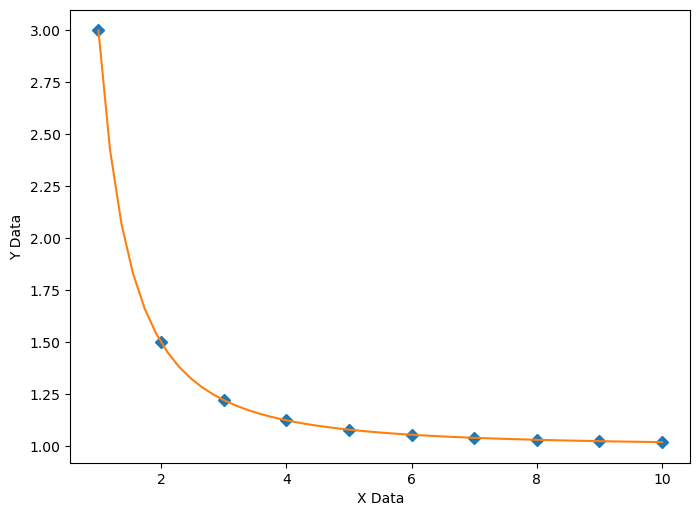

In [1]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

# power law function
def func_power_law(x,a,b,c):
    return a*(x**b)+c

test_X = [1.0,2,3,4,5,6,7,8,9,10]
test_Y =[3.0,1.5,1.2222222222222223,1.125,1.08,1.0555555555555556,1.0408163265306123,1.03125, 1.0246913580246915,1.02]


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func_power_law(test_X, *parameterTuple)
    return numpy.sum((test_Y - val) ** 2.0)


def generate_Initial_Parameters():
    # min and max used for bounds
    maxX = max(test_X)
    minX = min(test_X)
    maxY = max(test_Y)
    minY = min(test_Y)
    maxXY = max(maxX, maxY)

    parameterBounds = []
    parameterBounds.append([-maxXY, maxXY]) # seach bounds for a
    parameterBounds.append([-maxXY, maxXY]) # seach bounds for b
    parameterBounds.append([-maxXY, maxXY]) # seach bounds for c

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
    return result.x

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(func_power_law, test_X, test_Y, geneticParameters)

print('Parameters', fittedParameters)

modelPredictions = func_power_law(test_X, *fittedParameters) 

absError = modelPredictions - test_Y

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(test_Y))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

print()


##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(test_X, test_Y,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(test_X), max(test_X))
    yModel = func_power_law(xModel, *fittedParameters)

    # now the model as a line plot
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)